In [62]:
import sympy as sym
import pandas as pd
import numpy as np
import cmath
import math
import matplotlib.pyplot as plt

In [84]:
PI = cmath.pi
i = complex(0, 1)

Lambda = 400e-9

theta_list = np.array(range(int(math.radians(0) * 1000), int(math.radians(90) * 1000))) / 1000

miu = [1, 1, 1, 1, 1, 1]                                                               
                                                                     
d2, d3, d4 = 50e-9, 50.34e-9, 50.9e-9    

I_list = []

for theta in theta_list:

#     n1 = 1.52956867224
#     n2 = 0.05
#     n3 = 2.863
#     n4 = 1.755
#     n5 = 1.0

    n1 = 1.54
    n2 = 0.05
    n3 = 2.756
    n4 = 1.7855131978094
    n5 = 1.0

    eps1 = n1 ** 2
    eps2 = n2 ** 2
    eps3 = n3 ** 2
    eps4 = n4 ** 2
    eps5 = n5 ** 2
    
    q1 = (eps1 - (n1 ** 2) * (cmath.sin(theta) ** 2)) ** 0.5 / eps1
    q2 = (eps2 - (n1 ** 2) * (cmath.sin(theta) ** 2)) ** 0.5 / eps2
    q3 = (eps3 - (n1 ** 2) * (cmath.sin(theta) ** 2)) ** 0.5 / eps3
    q4 = (eps4 - (n1 ** 2) * (cmath.sin(theta) ** 2)) ** 0.5 / eps4
    q5 = (eps5 - (n1 ** 2) * (cmath.sin(theta) ** 2)) ** 0.5 / eps5


    beta2 = (2 * PI * d2 / Lambda) * (eps2 - (n1 ** 2) * cmath.sin(theta) ** 2) ** 0.5
    beta3 = (2 * PI * d3 / Lambda) * (eps3 - (n1 ** 2) * cmath.sin(theta) ** 2) ** 0.5
    beta4 = (2 * PI * d4 / Lambda) * (eps4 - (n1 ** 2) * cmath.sin(theta) ** 2) ** 0.5

    M2 = np.array([[cmath.cos(beta2), - i * cmath.sin(beta2 / q2)], [- i * q2 * cmath.sin(beta2), cmath.cos(beta2)]])
    M3 = np.array([[cmath.cos(beta3), - i * cmath.sin(beta3 / q3)], [- i * q3 * cmath.sin(beta3), cmath.cos(beta3)]])
    M4 = np.array([[cmath.cos(beta4), - i * cmath.sin(beta4 / q4)], [- i * q3 * cmath.sin(beta4), cmath.cos(beta4)]])

    M = M2 * M3 * M4

    M11 = M[0][0]
    M12 = M[0][1]
    M21 = M[1][0]
    M22 = M[1][1]
    
    I_list.append(abs((M11 + M12 * q5) * q1 - (M21 + M22 * q5) / (M11 + M12 * q5) * q1 + (M21 + M22 * q5)) ** 2)

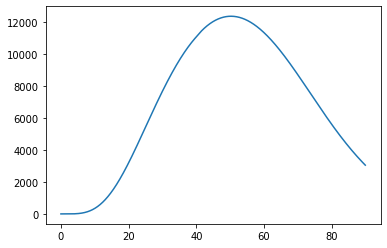

In [85]:
degree_list = [math.degrees(j) for j in theta_list]
plt.plot(degree_list, I_list)

In [86]:
data = pd.DataFrame({'theta': degree_list, 'I': I_list})
r1 = data['I'].max()
data['max'] = r1
data['theta'][data['I'] == r1]

877    50.248399
Name: theta, dtype: float64